In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp
# from scipy.optimize import fsolve

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
# from __future__ import print_function
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

In [4]:
mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [5]:
figdir = './figures/'
plt.rc('text', usetex=True)

# Carryover of a saddle-node bifurcation
# Application: cell cycle

The gen activation model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate (add references here in markdown syntax: Segel2013, TysonNovak2011).


## 2. Bifurcation diagram

We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [6]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'm': 1.0,
          'n': 4}
ics = {'Y': 1.0, 'P': 0.5, 'A': 0.1}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 2]
DSargs.pdomain = {'m': [0, 2.0], 'k3pp': [0, 100.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [7]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.5420835741849908, 'P': 0.1364100558653051, 'Y': 0.22674444381187284},)

In [8]:
# bifurcation diagram for s
# first branch
PC = dst.ContClass(DS)
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['m']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  2.2439561642579105e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
A  =  0.3736425900480611
P  =  0.07504313742452423
Y  =  0.34769566351789216
m  =  0.5719350903526165

Eigenvalues = 

     (-21.454000,0.000000)
     (-0.000000,0.196742)
     (-0.000000,-0.196742)


w = 0.19674244175165728
l1 = -19.03987569948061


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.05877906321238243
P  =  0.051553019189486536
Y  =  0.43690530748322265
m  =  0.1769359636582977

Eigenvalues = 

     (-13.094156,0.000000)
     (-0.074183,0.000000)
     (0.000000,0.000000)


a = 0.38496960525991564

Neutral saddle found!

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
A  =  0.05044322270606754
P  =  0.8268816067902778
Y  =  0.04614240247650921
m  =  0.7933103435606997



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

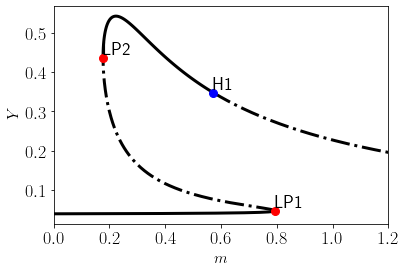

In [9]:
PC[name1].display(('m', 'Y'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 1.2))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 2.6))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleBifurcation.pdf', bbox_inches='tight')
plt.show()

In [10]:
# Two-parameter bifurcation
namefold1 = 'F01'
PCargs = dst.args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'k3pp']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold1].forward()
PC.curves[namefold1].backward()


Checking...
  <b,c> = 0.000000


BT Point found 
0 : 
A  =  0.053230657091656385
P  =  0.8134649721466989
Y  =  0.046867769979345504
m  =  1.2837714283140627
k3pp  =  27.0065422141586

Eigenvalues = 

     (-2.969081,0.000000)
     (-0.000000,0.000004)
     (-0.000000,-0.000004)



Checking...
  |a| = -21.805740


CP Point found 
0 : 
A  =  0.0639712152647502
P  =  0.7204132358497489
Y  =  0.05260297705799489
m  =  1.651669284376052
k3pp  =  35.845896562609376

Eigenvalues = 

     (-2.885281,0.000000)
     (-0.000000,0.000000)
     (0.524810,0.000000)



Checking...
  <b,c> = -0.000000


BT Point found 
0 : 
A  =  0.06449787618270868
P  =  0.07573219179246224
Y  =  0.345625528908416
m  =  0.2537312442006215
k3pp  =  16.984032816354794

Eigenvalues = 

     (-9.472290,0.000000)
     (-0.000000,0.000000)
     (0.000000,0.000000)


B Point found 
0 : 
A  =  0.05221861840423045
P  =  0.04013404097665594
Y  =  0.49916364521854717
m  =  0.10971397994158875
k3pp  =  1.6262633974339452e-08



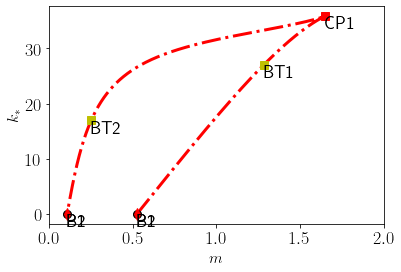

In [11]:
PC[namefold1].display(('m', 'k3pp'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
# PC.plot.fig1.toggleAll('off', bytype=['P', 'BT', 'CP'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 2.0))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.15))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{*}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
# plt.savefig(dir + 'ApplicationCellCyleTwoParBifurcation.pdf', bbox_inches='tight')
plt.show()